In [1]:
# import required libraries to munge data
import pandas as pd
import numpy as np

In [2]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


In [3]:
# read data from csv
accuracy_table = pd.read_csv("test_accuracy.csv", header=0)

In [4]:
# show properties
accuracy_table.describe()

,Iteration,L1,L2,L3,Testing Accuracy(256),Testing Accuracy(512),Testing Accuracy(2048),Testing Accuracy(8092)
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,72960.000000,36.741935,113.322581,480.000000,0.553514,0.543708,0.531833,0.548819
std,89702.961031,42.688998,162.454899,343.392622,0.299698,0.291934,0.286335,0.294267
min,6400.000000,2.000000,2.000000,128.000000,0.058594,0.076170,0.083010,0.086510
25%,6400.000000,4.000000,8.000000,224.000000,0.249024,0.248050,0.239865,0.243557
50%,12800.000000,16.000000,32.000000,384.000000,0.589844,0.578120,0.563235,0.590335
75%,199680.000000,64.000000,128.000000,640.000000,0.835938,0.822758,0.800412,0.830573
max,199680.000000,128.000000,512.000000,1024.000000,0.996094,0.980470,0.967290,0.972810


In [5]:
# get the testing accuracy for each iterations
iterations = [6400, 12800, 199680]
acc_tables = []
for i in iterations:
    acc_tables.append(accuracy_table[accuracy_table["Iteration"] == i])


In [6]:
L3_neurons = [128, 256, 512, 1024]
tables = []
for i in range(len(acc_tables)):
    for j in L3_neurons:
        table = acc_tables[i]
        table = table[table["L3"] == j]
        table = table["Testing Accuracy(512)"]
        tables.append(table)


This figure shows the accuracy changes when the neurons in conv1, conv2 and fully connected layers varies.



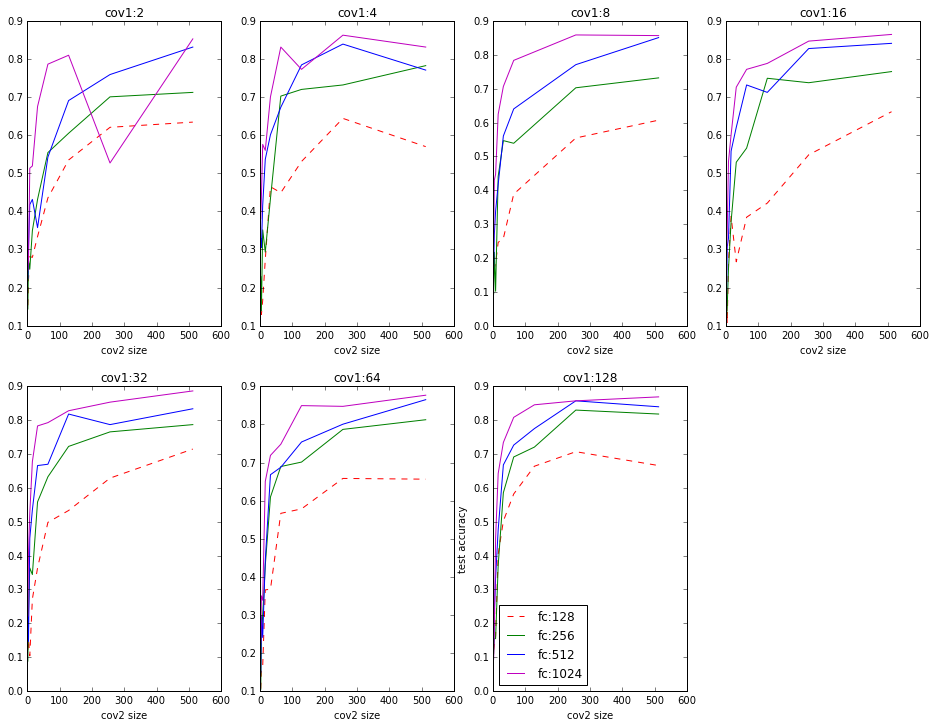


- comments 
  neurons in  conv 2 layers varies like follows: 2, 4, 8, 16, 32. 2/64, 128, 256, 512



In [60]:
print """
This figure shows the accuracy changes when the neurons in conv1, conv2 and fully connected layers varies.
"""
# set figure size
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')



# create sub plots
cov1_neurons = [2, 4, 8, 16, 32, 64, 128]
ax = []
for i in range(len(cov1_neurons)) :
    subplot = fig.add_subplot(2, 4, i+1)
    ax.append(subplot)
    
# show all accuacy change trends figure
markers = ["r--", "g-", "b-", "m-"]
legends = ["fc:128", "fc:256", "fc:512", "fc:1024"]
cov2_neurons = [2, 4, 8, 16, 32, 64, 128, 256, 512]


# number of accuracy observation count for each conv2
obs_counts = [0, 9, 18, 26, 35, 44, 53, 62] # XXX: dragon lives here
fully_size = 4

for i in range(fully_size):
    for j in range(len(cov1_neurons)):
        start_index = obs_counts[j]
        end_index = obs_counts[j+1]
        #print "cov1=" + str(cov1_neurons[j]) + ", " + str(start_index) + ":" + str(end_index) 
        # if conv1 is 8, missing condition exists
        if cov1_neurons[j] is 8:
            leaky_cov2_neurons = [2, 4, 8, 16, 32, 64, 256, 512] 
            ax[j].plot(leaky_cov2_neurons, tables[i][start_index:end_index], markers[i], label=legends[i])
        else:
            ax[j].plot(cov2_neurons, tables[i][start_index:end_index], markers[i], label=legends[i])
        ax[j].set_title("cov1:" + str(cov1_neurons[j]))
        ax[j].set_xlabel("cov2 size")
plt.ylabel("test accuracy")
plt.legend(loc="best")
plt.show()

print """
- comments 
  neurons in  conv 2 layers varies like follows: 2, 4, 8, 16, 32. 64, 128, 256, 512
"""

In [54]:
# save figure as a big svg file
#plt.annotate(..., fontsize='xx-small', ...) 
fig.savefig('all_acc_trend.svg', format='svg', dpi=900)


This another figure shows the accuracy changes when the neurons in conv1, conv2 and fully connected layers varies by log 2 scale.



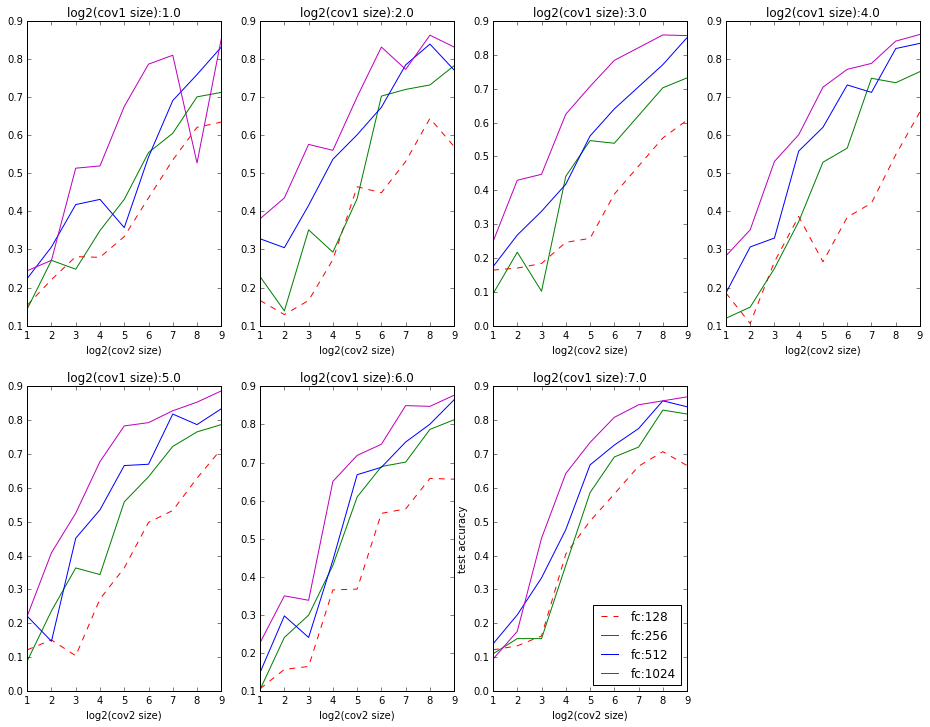

In [77]:
plt.clf() # reset plot

# define log function
from math import log
def log_scale(list, base=2):
    """apply log2 function to all list item"""
    for i in range(len(list)):
        list[i] = log(list[i], base)
    return list


print """
The another figure as below shows the accuracy changes when the neurons in conv1, conv2 and fully connected layers varies by log 2 scale.
"""
# set figure size
fig2 = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

cov1_neurons = log_scale([2, 4, 8, 16, 32, 64, 128])
#print cov1_neurons

# create sub plots
ax = []
for i in range(len(cov1_neurons)) :
    subplot = fig2.add_subplot(2, 4, i+1)
    ax.append(subplot)
    
# show all accuacy change trends figure
markers = ["r--", "g-", "b-", "m-"]
legends = ["fc:128", "fc:256", "fc:512", "fc:1024"]

cov2_neurons = log_scale([2, 4, 8, 16, 32, 64, 128, 256, 512])
#print cov2_neurons

# number of accuracy observation count for each conv2
obs_counts = [0, 9, 18, 26, 35, 44, 53, 62] # XXX: dragon lives here
fully_size = 4

for i in range(fully_size):
    for j in range(len(cov1_neurons)):
        start_index = obs_counts[j]
        end_index = obs_counts[j+1]
        #print "cov1=" + str(cov1_neurons[j]) + ", " + str(start_index) + ":" + str(end_index) 
        
        # if conv1 is 8, missing condition exists
        if int(cov1_neurons[j]) is 3: # XXX: float data can't be compared with another float data. therefore, I make them integer and compare
            leaky_cov2_neurons = log_scale([2, 4, 8, 16, 32, 64, 256, 512])
            #print leaky_cov2_neurons
            ax[j].plot(leaky_cov2_neurons, tables[i][start_index:end_index], markers[i], label=legends[i])
        else:
            ax[j].plot(cov2_neurons, tables[i][start_index:end_index], markers[i], label=legends[i])
        ax[j].set_title("log2(cov1 size):" + str(cov1_neurons[j]))
        ax[j].set_xlabel("log2(cov2 size)")
plt.ylabel("test accuracy")
plt.legend(loc="best")
plt.show()


In [78]:
# save figure as a big svg file
#plt.annotate(..., fontsize='xx-small', ...) 
fig2.savefig('all_acc_trend_log_scale.svg', format='svg', dpi=900)